In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [417]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [418]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [419]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)
""
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [420]:
cus = pd.read_csv('/content/drive/MyDrive/캐글/데이톤 이커머스 고객분석/open-3/Customer_info.csv')
dc = pd.read_csv('/content/drive/MyDrive/캐글/데이톤 이커머스 고객분석/open-3/Discount_info.csv')
sales = pd.read_csv('/content/drive/MyDrive/캐글/데이톤 이커머스 고객분석/open-3/Onlinesales_info.csv')
tax = pd.read_csv('/content/drive/MyDrive/캐글/데이톤 이커머스 고객분석/open-3/Tax_info.csv')
mkt = pd.read_csv('/content/drive/MyDrive/캐글/데이톤 이커머스 고객분석/open-3/Marketing_info.csv')

In [421]:
cus.info() # cus = 고객들의 정보를 나타낸다 ( 고객ID 성별 고객지역 가입기간(월))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [422]:
cus.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [423]:
sales.info() # 고객들의 구매 정보를 나타낸다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [424]:
sales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [425]:
tax.info() # 카테고리별로 세금을 나타낸다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품카테고리  20 non-null     object 
 1   GST     20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [426]:
tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [427]:
mkt.info() # 날짜별 마케팅 비용을 보여준다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [428]:
mkt.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


#현황분석

Text(0.5, 1.0, '월별 매출량')

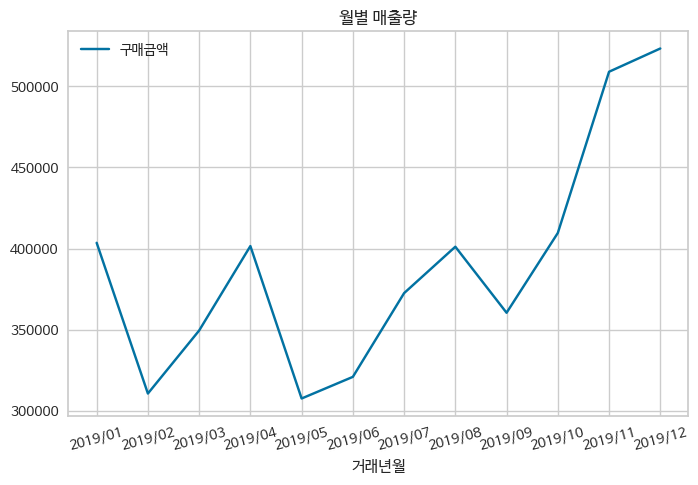

In [429]:

import datetime as dt
sales['거래날짜'] = pd.to_datetime(sales['거래날짜'])
sales['거래년월'] = sales['거래날짜'].dt.strftime("%Y/%m")
sales['구매금액'] = sales['평균금액'] * sales['수량'] # 구매금액 만들기


plt.figure(figsize=(8,5))
plt.xticks(rotation=15)
sns.lineplot(sales.groupby('거래년월')[['구매금액']].sum())
plt.title('월별 매출량')

## 월별 재구매 첫구매의 수와 매출 파악하기

In [430]:
# 고객별 첫구매 마지막 구매일 구하기
retention = sales.groupby('고객ID')[['거래날짜']].agg([min,max]).reset_index()
retention.columns =[['고객ID', '첫구매', '마지막구매']]

# 월별 매출중에서 첫구매와 재구매의 비율
first = sales.groupby('거래년월')[['구매금액']].sum()

a = sales.groupby('고객ID')[['거래날짜']].min().reset_index()
first # 거래년월 / 구매금액 / 재구매비율

retention.columns = ['고객ID', '첫구매', '마지막구매']
retention['첫구매'] = pd.to_datetime(retention['첫구매'])
retention['마지막구매'] = pd.to_datetime(retention['마지막구매'])

retention['첫구매'] = retention['첫구매'].dt.strftime("%Y/%m")
retention['마지막구매'] = retention['마지막구매'].dt.strftime("%Y/%m")
retention

,고객ID,첫구매,마지막구매
0,USER_0000,2019/09,2019/09
1,USER_0001,2019/03,2019/11
2,USER_0002,2019/06,2019/10
3,USER_0003,2019/12,2019/12
4,USER_0004,2019/09,2019/09
...,...,...,...
1463,USER_1463,2019/04,2019/04
1464,USER_1464,2019/06,2019/10
1465,USER_1465,2019/04,2019/06
1466,USER_1466,2019/10,2019/10


In [431]:
# 1월의 매출 중 재구매 비율  >
a = sales.groupby(['고객ID'])[['거래날짜']].min().reset_index()
a.rename(columns={'거래날짜' : '첫구매'}, inplace=True)

In [432]:
sales = sales.merge(a)

sales['첫구매유무']=sales['거래날짜'] - sales['첫구매']

sales['첫구매유무'].astype(object)

sales['첫구매유무'].replace('0 days', 1, inplace=True)


In [433]:
sales.loc[sales['첫구매유무'] != 1, '첫구매유무'] = 0


In [434]:
sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,거래년월,구매금액,첫구매,첫구매유무
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,2019/01,153.71,2019-01-01,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,2019/01,153.71,2019-01-01,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2019/01,2.05,2019-01-01,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,2019/01,87.65,2019-01-01,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,2019/01,16.50,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,2019/12,121.30,2019-12-31,1
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,2019/12,48.92,2019-12-31,1
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,2019/12,151.88,2019-12-31,1
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,2019/12,402.60,2019-12-31,1


In [435]:
retention = sales.groupby('거래년월')[['첫구매유무','구매금액']].sum()
m = sales.groupby('거래년월')[['거래ID']].count()
retention.reset_index(inplace=True)
m.reset_index(inplace=True)
retention = retention.merge(m)

retention = sales.groupby(['거래년월','첫구매유무'])[['구매금액']].agg(['sum','count']).reset_index()

In [436]:
retention.columns = ['거래년월', '첫거래유무', '구매금액', '구매횟수']


In [437]:
retention['총매출액'] = retention['구매금액'].sum()
retention['총거래량'] = retention['구매횟수'].sum()

retention['첫거래유무'].replace(0, '재구매',inplace=True)
retention['첫거래유무'].replace(1, '첫구매',inplace=True)
retention.rename(columns={'첫거래유무' : '첫거래/재구매'})

# 월별 첫구매/재구매의 수와 금액의 df로 만들었다.

,거래년월,첫거래/재구매,구매금액,구매횟수,총매출액,총거래량
0,2019/01,재구매,79880.12,754,4670794.62,52924
1,2019/01,첫구매,323744.46,3309,4670794.62,52924
2,2019/02,재구매,110000.87,1075,4670794.62,52924
3,2019/02,첫구매,200818.93,2209,4670794.62,52924
4,2019/03,재구매,115014.33,1599,4670794.62,52924
5,2019/03,첫구매,234593.76,2747,4670794.62,52924
6,2019/04,재구매,229466.09,1982,4670794.62,52924
7,2019/04,첫구매,172152.33,2168,4670794.62,52924
8,2019/05,재구매,154686.26,2182,4670794.62,52924
9,2019/05,첫구매,153077.16,2390,4670794.62,52924


In [438]:
retention_re = retention.loc[retention['첫거래유무'] == '재구매']
retention_re['재구매횟수'] = retention_re['구매횟수']/retention_re['총거래량'] * 100
retention_re['재구매매출량'] = retention_re['구매금액'] / retention_re['총매출액'] * 100


In [439]:
retention_nw = retention.loc[retention['첫거래유무'] == '첫구매']

In [440]:
retention_nw

,거래년월,첫거래유무,구매금액,구매횟수,총매출액,총거래량
1,2019/01,첫구매,323744.46,3309,4670794.62,52924
3,2019/02,첫구매,200818.93,2209,4670794.62,52924
5,2019/03,첫구매,234593.76,2747,4670794.62,52924
7,2019/04,첫구매,172152.33,2168,4670794.62,52924
9,2019/05,첫구매,153077.16,2390,4670794.62,52924
11,2019/06,첫구매,172170.63,2226,4670794.62,52924
13,2019/07,첫구매,103836.55,1523,4670794.62,52924
15,2019/08,첫구매,167440.86,2693,4670794.62,52924
17,2019/09,첫구매,132004.07,1652,4670794.62,52924
19,2019/10,첫구매,173827.82,1768,4670794.62,52924



---
*   **첫구매와 재구매를 파악하여 첫구매/재구매의 수를 시각화했다.**
---


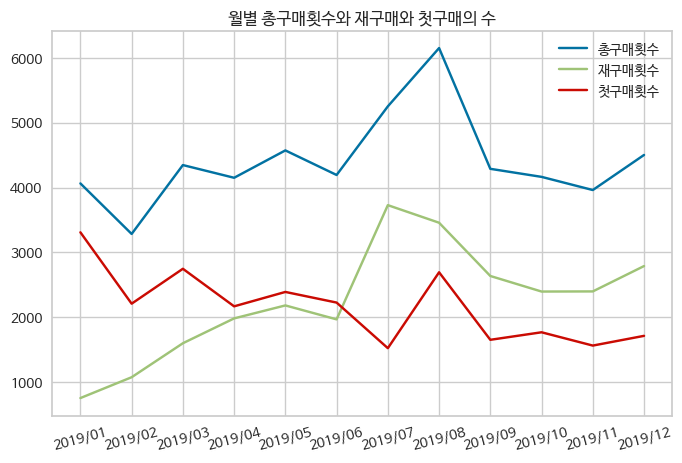

In [441]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=15)



plt.plot(sales.groupby('거래년월')[['거래ID']].count(),label= '총구매횟수')
plt.plot(retention_re['거래년월'],retention_re['구매횟수'], label ='재구매횟수')
plt.plot(retention_nw['거래년월'], retention_nw['구매횟수'], label ='첫구매횟수')
plt.title('월별 총구매횟수와 재구매와 첫구매의 수')
plt.legend()


----
*   **재구매 수 > 첫구매 수임을 알 수 있음**
---


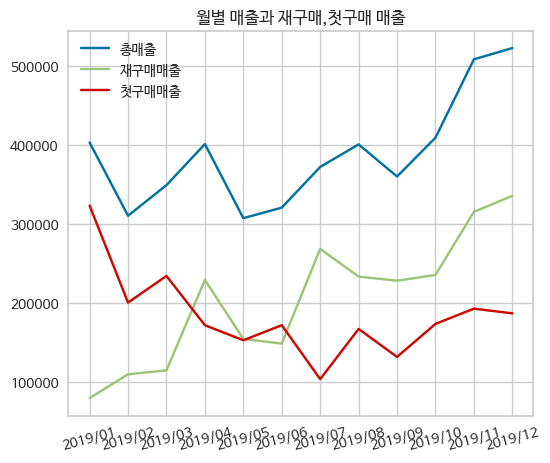

In [442]:
plt.figure(figsize=(6,5))
plt.xticks(rotation=15)

plt.plot(sales.groupby('거래년월')[['구매금액']].sum(),label='총매출')
plt.plot(retention_re['거래년월'],retention_re['구매금액'], label = '재구매매출')
plt.plot(retention_nw['거래년월'],retention_nw['구매금액'], label = '첫구매매출')



plt.title('월별 매출과 재구매,첫구매 매출')
plt.legend()


----
1. **신규 유입과 신규 매출은 지속감소**
2.   **월매출과 재구매매출은 비례하는 경향 > 재구매하는 고객들이 실질적인 매출을 이끈다고 볼 수 있음**
3.   **지속적으로 고객들이 재구매 할 수 있도록 유도하는 것이 중요해보임 **
-----

# RFM 분석을 통하여 고객들을 분류하기


1.   Recency : 얼마나 최근에 구매했는가 : 마지막 구매로부터 지난 일수
2.   Frequency : 얼마나 자주 구매했는가 : 구매의 횟수
3.   Monetary : 얼마나 많은 금액을 지출했는가 : 구매의 금액


In [443]:
# R구하기 : 2019-12-31 - 마지막 거래 날짜
from datetime import datetime
sales['거래날짜'] = pd.to_datetime(sales['거래날짜'])
rdata = sales.groupby('고객ID')[['거래날짜']].max()

rdata['R'] = pd.to_datetime('2019-12-31') - rdata['거래날짜']
rdata.reset_index(inplace=True)


In [444]:
# F구하기 : 2019-01-01 ~ 2019-12-31사이에 몇번 구매햇는가?
fdata = sales.groupby('고객ID')[['거래날짜']].count()
fdata.rename(columns={'거래날짜' : 'F'}, inplace=True)
fdata.reset_index(inplace=True)
fdata

,고객ID,F
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [445]:
# Monetary : 얼마나 많은 금액을 지출했는가
sales['구매금액'] = sales['수량'] * sales['평균금액']
mdata = sales.groupby('고객ID')[['구매금액']].sum()
mdata.rename(columns={'구매금액' : 'M'},inplace=True)
mdata.reset_index(inplace=True)
mdata

,고객ID,M
0,USER_0000,30.99
1,USER_0001,13834.90
2,USER_0002,1442.12
3,USER_0003,1360.07
4,USER_0004,1442.47
...,...,...
1463,USER_1463,544.34
1464,USER_1464,2363.05
1465,USER_1465,101.56
1466,USER_1466,298.00


In [446]:
# RFM df 만듦
rfm_df = rdata.merge(fdata,on='고객ID')
rfm_df = rfm_df.merge(mdata, on ='고객ID')
rfm_df['R'] = rfm_df['R'].astype(str).str.replace(' days','')
rfm_df['R'] = rfm_df['R'].astype(int)

rfm_df

,고객ID,거래날짜,R,F,M
0,USER_0000,2019-09-15,107,2,30.99
1,USER_0001,2019-11-02,59,60,13834.90
2,USER_0002,2019-10-19,73,23,1442.12
3,USER_0003,2019-12-14,17,17,1360.07
4,USER_0004,2019-09-15,107,36,1442.47
...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34
1464,USER_1464,2019-10-05,87,40,2363.05
1465,USER_1465,2019-06-20,194,8,101.56
1466,USER_1466,2019-10-23,69,1,298.00


# KMEANS 활용 군집화

**KMEANS와 + RFM 분석 결과를 합쳐 군집을 분류해주었다.**

In [447]:

rfm_df = rfm_df.merge(cus)
rfm_df

,고객ID,거래날짜,R,F,M,성별,고객지역,가입기간
0,USER_0000,2019-09-15,107,2,30.99,여,New York,31
1,USER_0001,2019-11-02,59,60,13834.90,남,New York,20
2,USER_0002,2019-10-19,73,23,1442.12,남,California,39
3,USER_0003,2019-12-14,17,17,1360.07,남,California,25
4,USER_0004,2019-09-15,107,36,1442.47,여,Chicago,31
...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34,여,California,5
1464,USER_1464,2019-10-05,87,40,2363.05,남,New York,43
1465,USER_1465,2019-06-20,194,8,101.56,남,Chicago,25
1466,USER_1466,2019-10-23,69,1,298.00,여,Chicago,47


In [448]:
# 스케일링을 진행해 준 뒤 KMEANS 분류를 진행해주었다.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
km =KMeans()
ss= StandardScaler()

# RFM 데이터를 스케일링 했다.
x = rfm_df[['R','F','M']]
x_scaled = ss.fit_transform(x)


In [449]:
rfm_df['R_scaled'] = x_scaled[:,0]
rfm_df['F_scaled'] = x_scaled[:,1]
rfm_df['M_scaled'] = x_scaled[:,2]

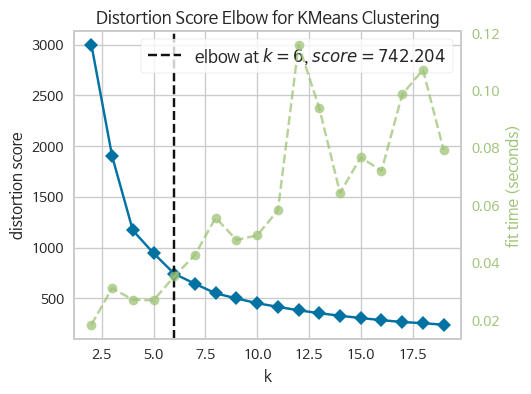

In [450]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(5,4))
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans,k=(2,20))


elbow.fit(x_scaled)
elbow.show()
plt.show()
# elbow method를 통해 군집을 6개로 분류해주었다.

In [451]:
km = KMeans(n_clusters = 6, random_state=42)

#KMEANS 진행
km.fit(x_scaled)

KMeans(n_clusters=6, random_state=42)

In [452]:
label=km.labels_
rfm_df['군집'] = label
rfm_df

,고객ID,거래날짜,R,F,M,성별,고객지역,가입기간,R_scaled,F_scaled,M_scaled,군집
0,USER_0000,2019-09-15,107,2,30.99,여,New York,31,-0.365961,-0.669410,-0.622176,1
1,USER_0001,2019-11-02,59,60,13834.90,남,New York,20,-0.837001,0.470788,2.103672,4
2,USER_0002,2019-10-19,73,23,1442.12,남,California,39,-0.699614,-0.256579,-0.343522,0
3,USER_0003,2019-12-14,17,17,1360.07,남,California,25,-1.249160,-0.374531,-0.359724,0
4,USER_0004,2019-09-15,107,36,1442.47,여,Chicago,31,-0.365961,-0.001018,-0.343452,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,544.34,여,California,5,1.233611,-0.571117,-0.520806,5
1464,USER_1464,2019-10-05,87,40,2363.05,남,New York,43,-0.562227,0.077617,-0.161666,0
1465,USER_1465,2019-06-20,194,8,101.56,남,Chicago,25,0.487799,-0.551458,-0.608241,1
1466,USER_1466,2019-10-23,69,1,298.00,여,Chicago,47,-0.738867,-0.689068,-0.569450,0


Text(0.5, 1.0, 'R VS F')

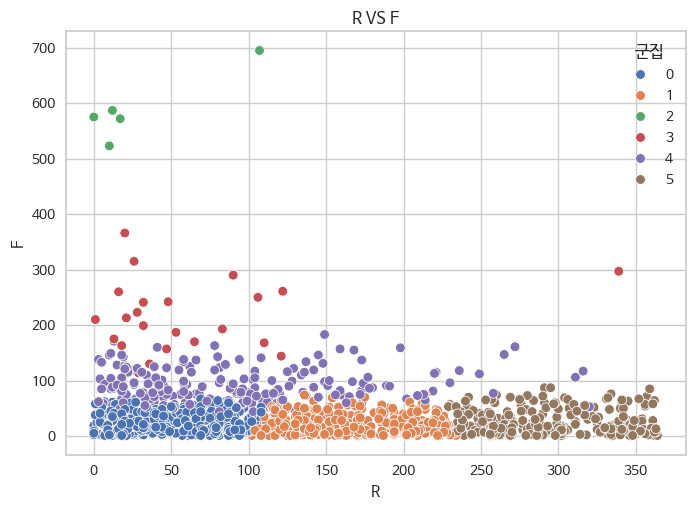

In [453]:
# R vs M
# Recency : 얼마나 최근에 구매했는가 : 구매 안한 일수
# Frequency : 얼마나 자주 구매했는가 : 구매의 횟수
# Monetary : 얼마나 많은 금액을 지출했는가 : 구매의 금액

sns.scatterplot(x=rfm_df['R'], y=rfm_df['F'],
                hue=rfm_df['군집'], palette='deep')

plt.title('R VS F')

----
**비교적 최근에 온 사람들 (R이 낮음)이 자주옴 (F가 높음)**


Text(0.5, 1.0, 'R vs M')

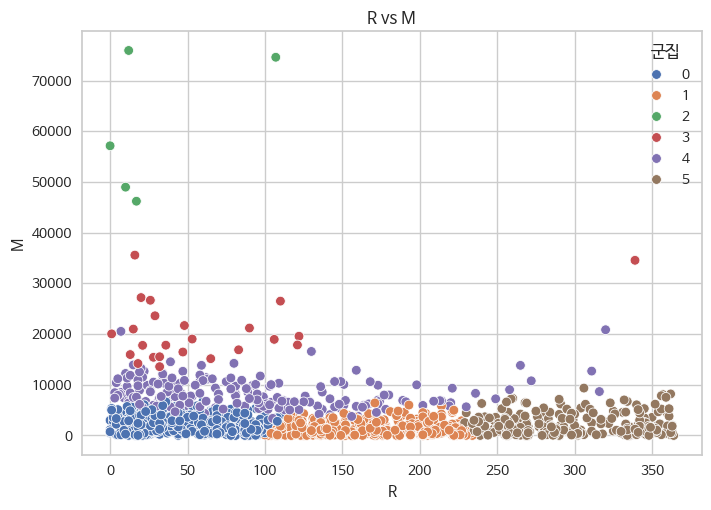

In [454]:

sns.scatterplot(x=rfm_df['R'], y=rfm_df['M'],
                hue=rfm_df['군집'], palette='deep')
plt.title('R vs M')



----
**자주오면(R이 낮음) 돈을 많이씀(M이높음)**

Text(0.5, 1.0, 'M vs F')

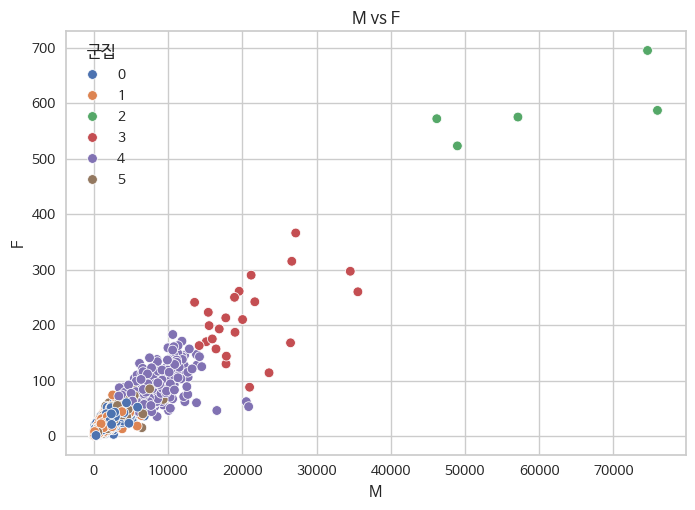

In [455]:

sns.scatterplot(x=rfm_df['M'], y=rfm_df['F'],
                hue=rfm_df['군집'], palette='deep')
rfm_df['군집'].unique()

plt.title('M vs F')

최우선적인 목표 = 사람들의 R 수치를 내려야 함 >> 최근에 방문함 > 자주 방문할 가능성 높아짐 > 돈을 많이 쓸 가능성 높아짐

In [456]:
rfm_info = rfm_df.groupby('군집')[['R','F','M']].agg(['mean','sum']).reset_index()

In [457]:
rfm_info.columns

MultiIndex([('군집',     ''),
            ( 'R', 'mean'),
            ( 'R',  'sum'),
            ( 'F', 'mean'),
            ( 'F',  'sum'),
            ( 'M', 'mean'),
            ( 'M',  'sum')],
           )

In [458]:
rfm_info.columns = ['군집','R_mean', 'R_sum', 'F_mean','F_sum','M_mean', 'M_sum']

In [459]:
rfm_info

,군집,R_mean,R_sum,F_mean,F_sum,M_mean,M_sum
0,0,47.298013,21426,23.607064,10694,2180.970265,987979.53
1,1,165.105603,76609,19.064655,8846,1328.051164,616215.74
2,2,29.200000,146,590.400000,2952,60572.570000,302862.85
3,3,61.291667,1471,210.666667,5056,20508.047083,492193.13
4,4,89.422330,18421,90.160194,18573,8216.744126,1692649.29
5,5,296.670886,93748,21.528481,6803,1831.943291,578894.08


In [460]:
#
rfm_info['군집'].loc[2:2] = 'VVip' # 2 >> RFM모두 상위권
rfm_info['군집'].loc[4:4] ='Gold' # 4 >> VIP 다음으로 높음
rfm_info['군집'].loc[0:0] = 'New' # 0 >> gold보다 RFM이 낮지만, R이 낮아 비교적 신규고객/복귀고객이라고 유추가능
rfm_info['군집'].loc[3:3] = 'Vip' # 3 >> VVIP 다음으로 높음
rfm_info['군집'].loc[1:1] = 'Silver' # >> RFM 이 모두 낮음
rfm_info['군집'].loc[5:5] = 'Bronze' # >> silver보다 R이 더 커 구매 안한지 오래된 군집이라 유추 가능


In [461]:
idx= [3,4,0,1,2,5]
rfm_info.index = idx

rfm_info.sort_index(inplace=True)


In [462]:
rfm_info

,군집,R_mean,R_sum,F_mean,F_sum,M_mean,M_sum
0,VVip,29.200000,146,590.400000,2952,60572.570000,302862.85
1,Vip,61.291667,1471,210.666667,5056,20508.047083,492193.13
2,Gold,89.422330,18421,90.160194,18573,8216.744126,1692649.29
3,New,47.298013,21426,23.607064,10694,2180.970265,987979.53
4,Silver,165.105603,76609,19.064655,8846,1328.051164,616215.74
5,Bronze,296.670886,93748,21.528481,6803,1831.943291,578894.08


In [463]:
# #2 = vvip
# 2.   3 = vip
# 3.   4 = gold
# 4.   0 = new
# 5.   1 = silver
# 6.   5 = bronze


rfm_df['군집'].replace({2:'VVip',
                3:'Vip',
                4:'Gold',
                0:'New',
                1:'Silver',
                5:'Bronze'}, inplace=True)

In [464]:
cus.sort_values(by='고객ID',inplace=True)


In [465]:
cus['군집'] = rfm_df['군집']
cus.reset_index(inplace=True)

In [466]:
cus.drop('index', axis=1, inplace=True)

In [467]:
cus['군집'] = rfm_df['군집']

Text(0.5, 1.0, 'R vs M')

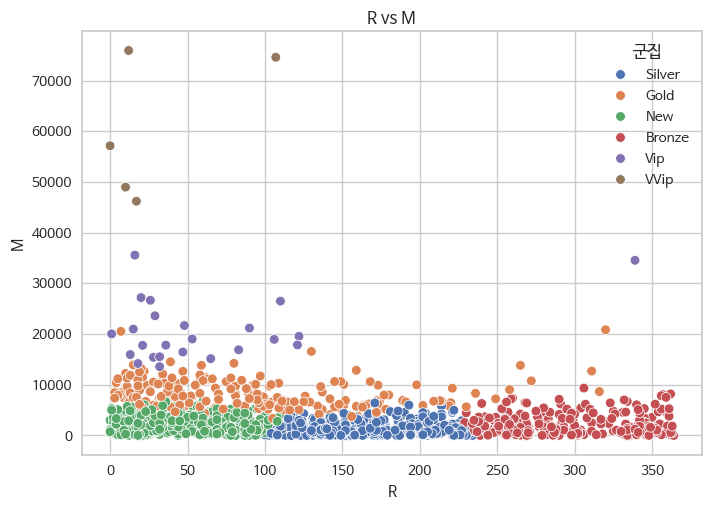

In [468]:
sns.scatterplot(x=rfm_df['R'], y=rfm_df['M'],
                hue=rfm_df['군집'], palette='deep')
plt.title('R vs M')

Text(0.5, 1.0, 'R VS F')

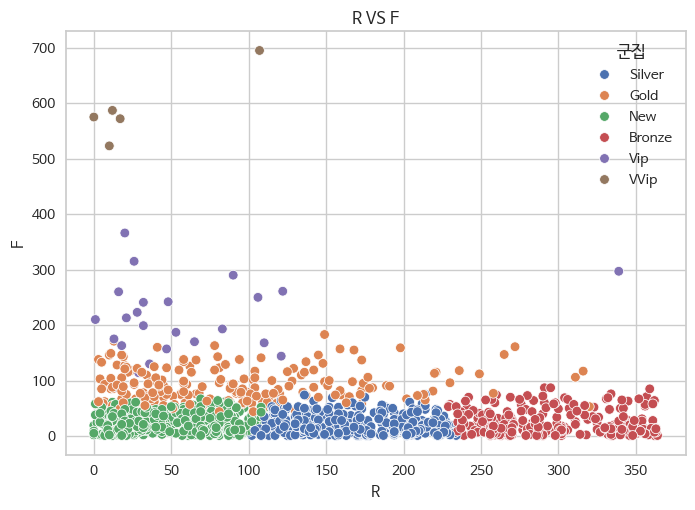

In [469]:
sns.scatterplot(x=rfm_df['R'], y=rfm_df['F'],
                hue=rfm_df['군집'], palette='deep')

plt.title('R VS F')



Text(0.5, 1.0, 'M vs F')

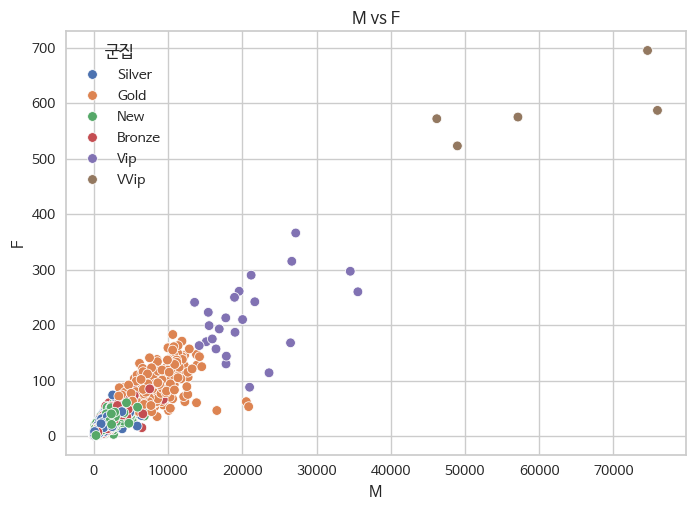

In [470]:

sns.scatterplot(x=rfm_df['M'], y=rfm_df['F'],
                hue=rfm_df['군집'], palette='deep')


plt.title('M vs F')

In [471]:
# KMEANS와 RFM활용하여 분류 진행 후 등급을 매겼다.

# 세그먼트 별 Active user / Inactive user 파악

In [472]:
rfm_df['R'].describe()

count    1468.000000
mean      144.292234
std       101.936959
min         0.000000
25%        55.000000
50%       131.000000
75%       220.000000
max       364.000000
Name: R, dtype: float64

## active 유저 / inactive 유저의 매출비율 파악

# 군집별 Active user / Inactive user 비교




.

*   active_user = R값이 대략 상위 35%해당하는 사람들(90일 이하)이라고 정의
   - 마지막 구매가 3달 이내인 사람들.


 * inactive_user = R값이 대략 하위 35%에 해당하는 사람들(180이상)이라고 정의
   - 마지막 구매한지 6달이 넘은 사람들





In [473]:
active_user = rfm_df.loc[rfm_df['R'] <= 90]
inactive_user = rfm_df.loc[rfm_df['R'] >= 180]
bb=cus[['고객ID', '성별']]
sales= sales.merge(bb)

## active 와 inactive의 매출분석

In [474]:
a = active_user['M'].sum()
i = inactive_user['M'].sum()
total=sales['구매금액'].sum()

print('active_user 고객 매출비율 :',round(a/total,2)*100)
print('inactive_user 고객 매출 비율 :', round(i/total,2)*100)
print('active와 inactive 사이의 고객 매출 비율 :', 24.0)

# active_user의 매출비율이 전체 비율의 54%를 차지한다.
# 이번 분석에선 active_user와 inactive_user만 분석하였다.

active_user 고객 매출비율 : 54.0
inactive_user 고객 매출 비율 : 22.0
active와 inactive 사이의 고객 매출 비율 : 24.0


# 세그먼트별 active user/inactive user 파악

## VVIP

<Axes: xlabel='성별', ylabel='count'>

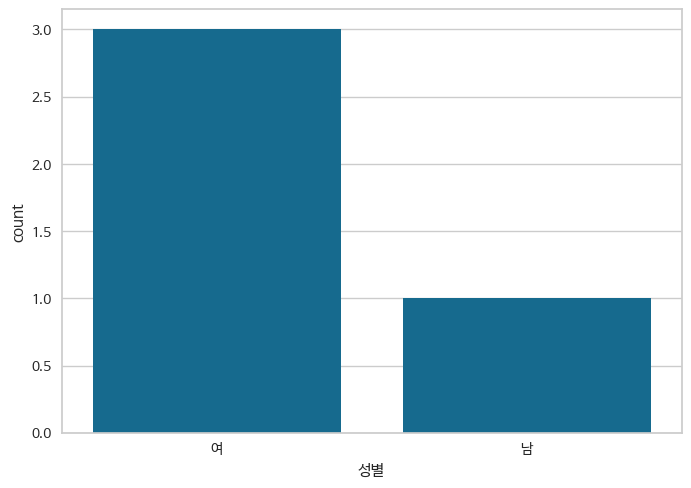

In [475]:
active_VVip = active_user.loc[active_user['군집'] == 'VVip']
sns.countplot(data= active_VVip,
            x='성별')


In [476]:
active_VVip[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,4.000000,4.000000,4.000000,4.000000
mean,9.750000,564.250000,57065.372500,32.000000
std,7.135592,28.253318,13409.727788,7.958224
min,0.000000,523.000000,46205.770000,21.000000
25%,7.500000,559.750000,48286.727500,30.000000
50%,11.000000,573.500000,53059.085000,33.500000
75%,13.250000,578.000000,61837.730000,35.500000
max,17.000000,587.000000,75937.550000,40.000000


### 월별 매출액

Text(0.5, 1.0, '월별 VVip_active_user의 매출액')

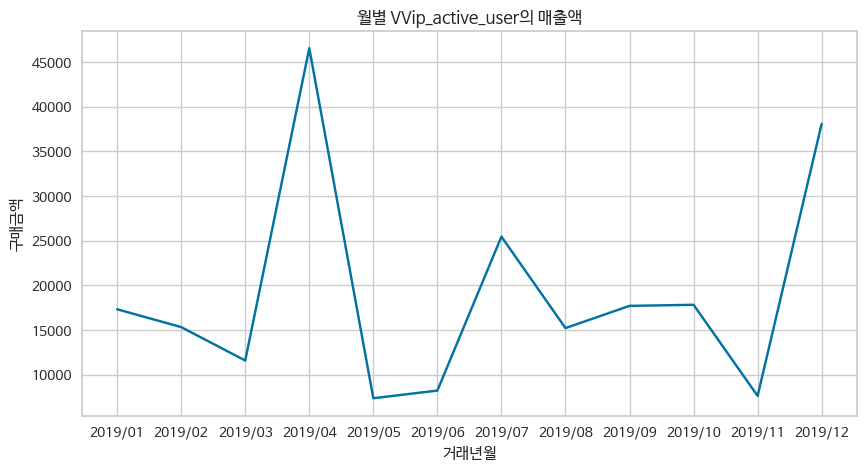

In [477]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
active_VVip_sales = sales.loc[sales['고객ID'].isin(active_VVip['고객ID'])]

active_VVip_gr = active_VVip_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_VVip_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 VVip_active_user의 매출액')

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 VVip_active_user의 매출액')

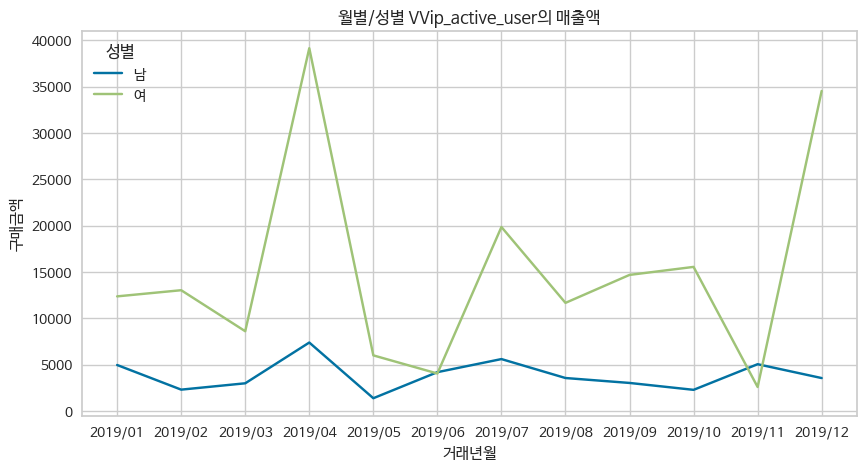

In [478]:
active_VVip_sales = sales.loc[sales['고객ID'].isin(active_VVip['고객ID'])]

active_VVip_gr2 = active_VVip_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_VVip_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 VVip_active_user의 매출액')





1.     11월 기점으로 남성 < 여성
2.  여성 매출의 급상승 남성의 급하락  


### 구매카테고리별 판매량과 매출액의 비교

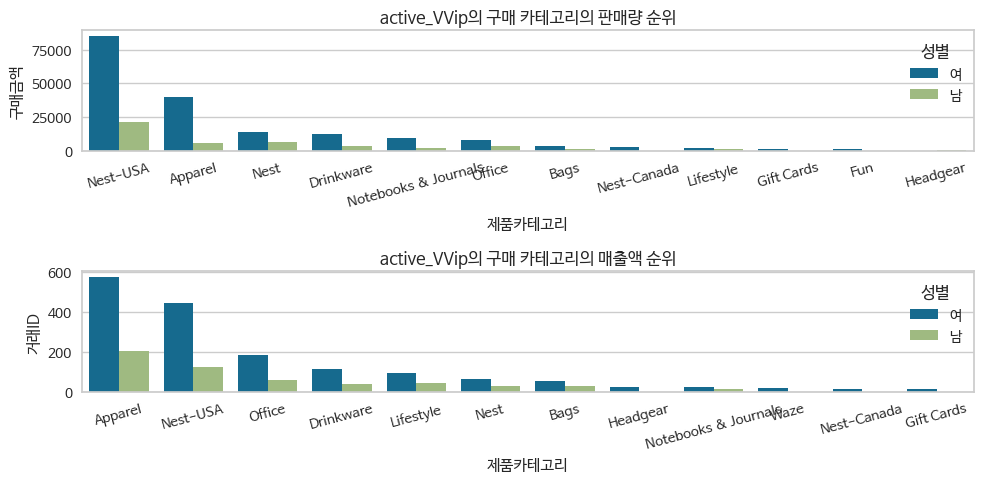

In [479]:
gr= active_VVip_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =active_VVip_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('active_VVip의 구매 카테고리의 판매량 순위')
ax[1].set_title('active_VVip의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()


### 쿠폰사용여부

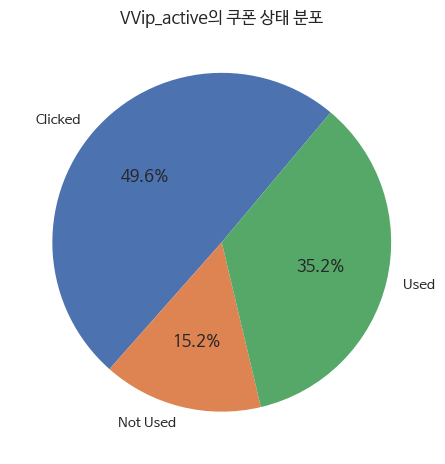

In [480]:
coupon = active_VVip_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon['총합'] = coupon['횟수'].sum()
coupon['비율'] = round(coupon['횟수']/coupon['총합'] * 100,2)


plt.pie(coupon['비율'], labels=coupon['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('VVip_active의 쿠폰 상태 분포')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Drinkware'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Nest'),
  Text(6, 0, 'Bags'),
  Text(7, 0, 'Notebooks & Journals'),
  Text(8, 0, 'Headgear'),
  Text(9, 0, 'Waze'),
  Text(10, 0, 'Bottles'),
  Text(11, 0, 'Nest-Canada'),
  Text(12, 0, 'Gift Cards'),
  Text(13, 0, 'Accessories'),
  Text(14, 0, 'Housewares'),
  Text(15, 0, 'Fun')])

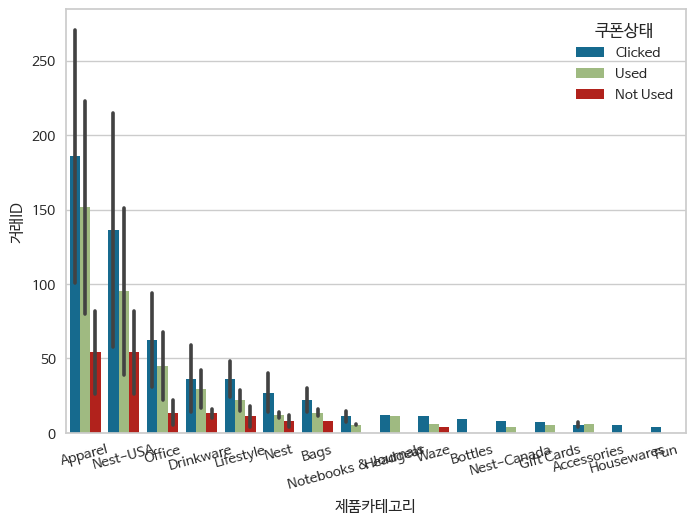

In [481]:
gr3 =active_VVip_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')

plt.xticks(rotation=15)

## Vip

<Axes: xlabel='성별', ylabel='count'>

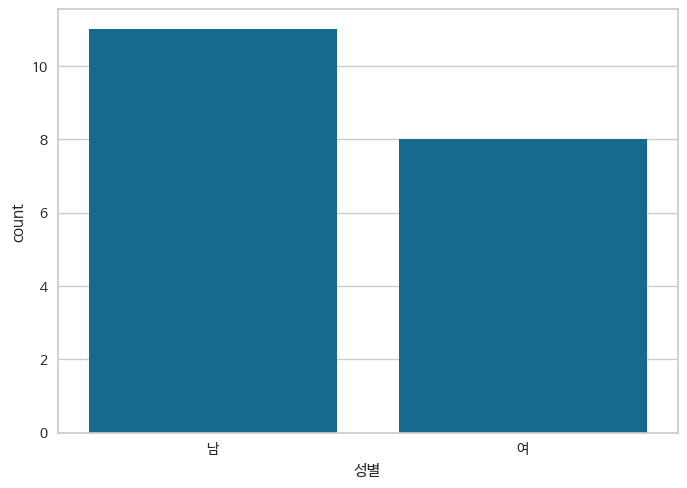

In [482]:
active_vip = active_user.loc[active_user['군집'] == 'Vip']
sns.countplot(data= active_vip,
            x='성별')


In [483]:
active_vip[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,19.000000,19.000000,19.000000,19.000000
mean,35.421053,207.157895,19724.041579,26.210526
std,23.756440,68.941411,5499.169820,13.062155
min,1.000000,88.000000,13576.330000,6.000000
25%,19.000000,166.500000,15743.835000,16.000000
50%,29.000000,199.000000,17809.850000,25.000000
75%,47.500000,241.500000,21441.225000,37.000000
max,90.000000,366.000000,35574.460000,46.000000


### 월별 매출액

Text(0.5, 1.0, '월별 vip_active_user의 매출액')

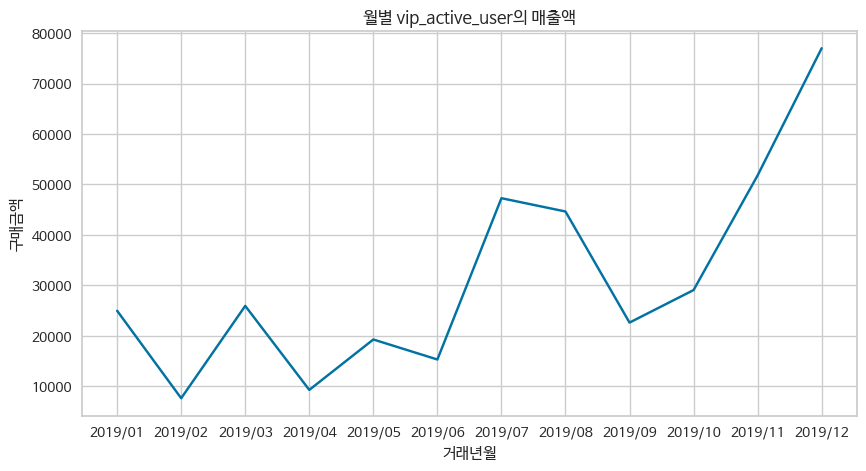

In [484]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
active_vip_sales = sales.loc[sales['고객ID'].isin(active_vip['고객ID'])]

active_vip_gr = active_vip_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_vip_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 vip_active_user의 매출액')

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 vip_active_user의 매출액')

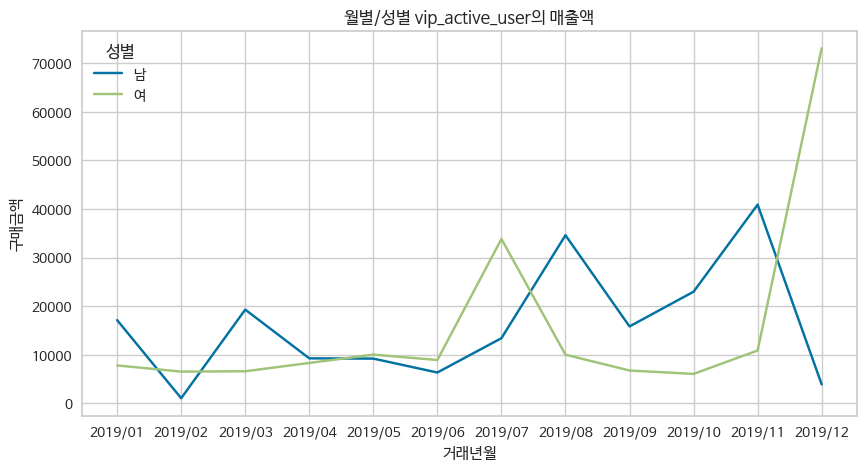

In [485]:
active_vip_sales = sales.loc[sales['고객ID'].isin(active_vip['고객ID'])]

active_vip_gr2 = active_vip_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_vip_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 vip_active_user의 매출액')





1.     11월 기점으로 남성 < 여성
2.  여성 매출의 급상승 남성의 급하락  


### 구매카테고리별 판매량과 매출액의 비교

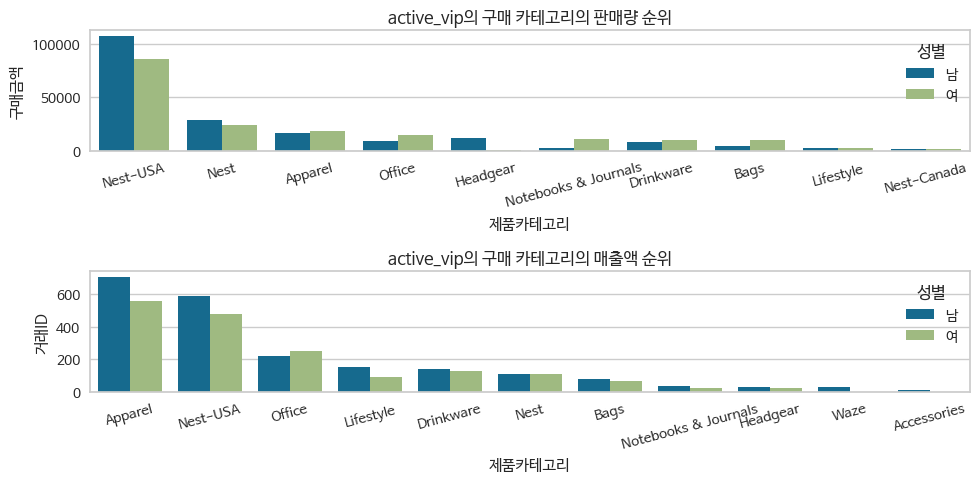

In [486]:
gr= active_vip_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =active_vip_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('active_vip의 구매 카테고리의 판매량 순위')
ax[1].set_title('active_vip의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()




1.   nest_usa, nest, apparel, office 순으로 판매
2.   매출이 특출난건 apparel.
3.   drinkware
4.   남성은 headgear를 좋아하고 여성은 노트북과 저널을 많이 구매






### 쿠폰사용여부

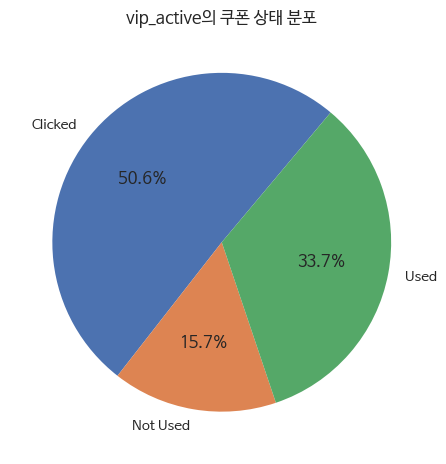

In [487]:
coupon = active_vip_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon['총합'] = coupon['횟수'].sum()
coupon['비율'] = round(coupon['횟수']/coupon['총합'] * 100,2)


plt.pie(coupon['비율'], labels=coupon['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('vip_active의 쿠폰 상태 분포')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Lifestyle'),
  Text(4, 0, 'Drinkware'),
  Text(5, 0, 'Nest'),
  Text(6, 0, 'Bags'),
  Text(7, 0, 'Headgear'),
  Text(8, 0, 'Waze'),
  Text(9, 0, 'Notebooks & Journals'),
  Text(10, 0, 'Bottles'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Nest-Canada')])

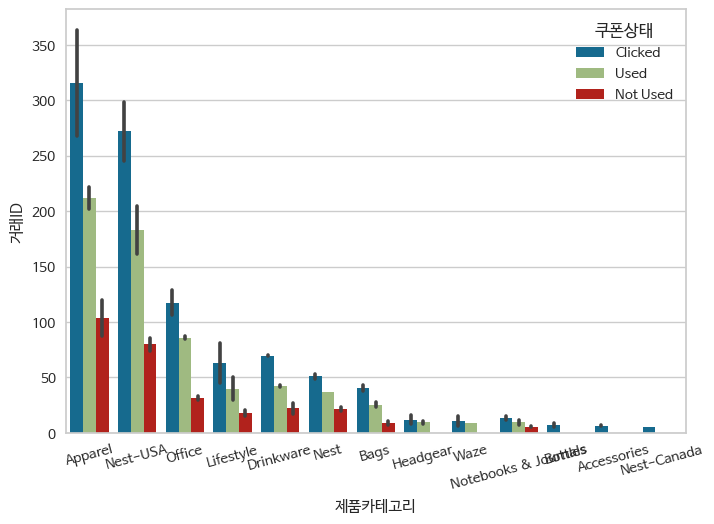

In [488]:
gr3 =active_vip_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')

plt.xticks(rotation=15)

##Gold

In [489]:
active_gold = active_user.loc[active_user['군집'] == 'Gold']
inactive_gold = inactive_user.loc[inactive_user['군집'] == 'Gold']

ra= round(active_gold['고객ID'].count() / (active_gold['고객ID'].count() + inactive_gold['고객ID'].count()),2)

print('gold군집의 active_user의 수 : ', active_gold['고객ID'].count())
print('gold군집의 inactive_user의 수 : ', inactive_gold['고객ID'].count())
print('active_user의 비율 :', ra*100,'%')
print('active_user_gold 의 매출비중:', round(active_gold['M'].sum() / rfm_df['M'].sum(),2)*100,'%')

gold군집의 active_user의 수 :  116
gold군집의 inactive_user의 수 :  20
active_user의 비율 : 85.0 %
active_user_gold 의 매출비중: 22.0 %


<Axes: xlabel='성별', ylabel='count'>

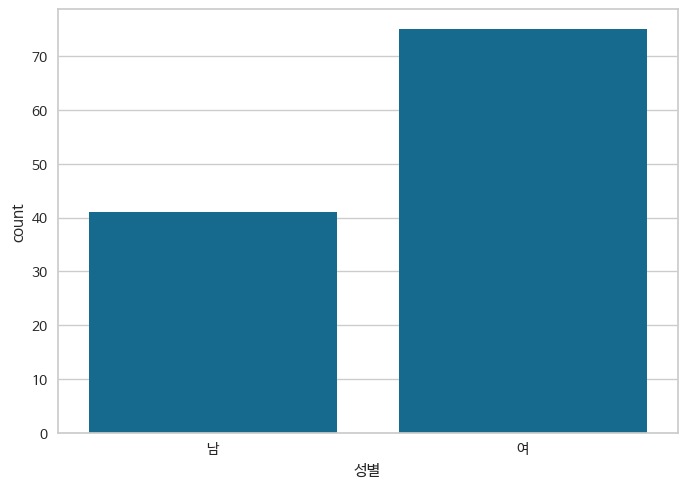

In [490]:
active_gold = active_user.loc[active_user['군집'] == 'Gold']
sns.countplot(data= active_gold,
            x='성별')


In [491]:
active_gold[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,116.000000,116.000000,116.000000,116.000000
mean,40.163793,89.370690,8887.250431,25.767241
std,24.109512,30.072241,2641.308906,14.187783
min,3.000000,35.000000,4378.810000,2.000000
25%,19.000000,66.500000,7045.287500,11.000000
50%,37.500000,84.000000,8467.315000,27.500000
75%,58.000000,111.250000,10770.995000,37.000000
max,90.000000,171.000000,20537.740000,50.000000


### 월별 매출액

Text(0.5, 1.0, '월별 gold_active_user의 매출액')

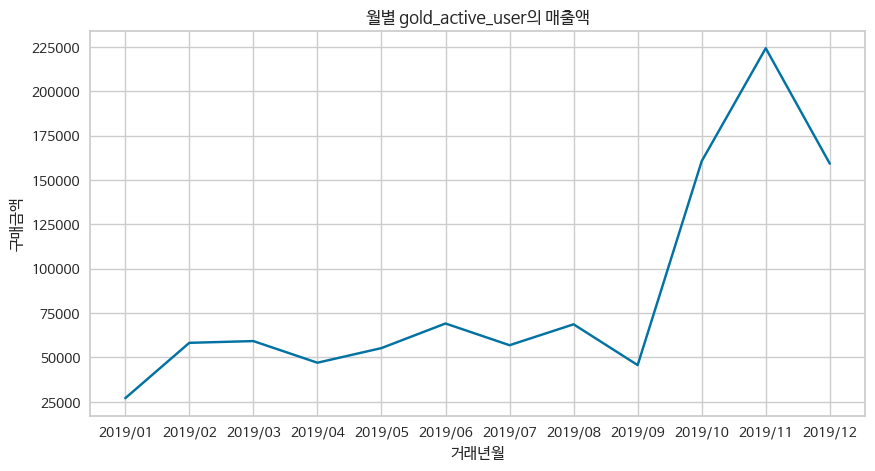

In [492]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
active_gold_sales = sales.loc[sales['고객ID'].isin(active_gold['고객ID'])]

active_gold_gr = active_gold_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_gold_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 gold_active_user의 매출액')

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 gold_active_user의 매출액')

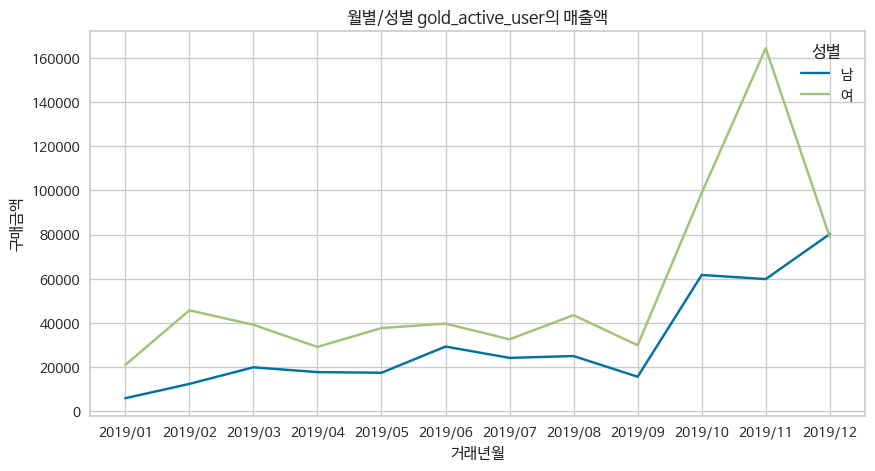

In [493]:
active_gold_sales = sales.loc[sales['고객ID'].isin(active_gold['고객ID'])]

active_gold_gr2 = active_gold_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_gold_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 gold_active_user의 매출액')



### 구매카테고리별 판매량과 매출액의 비교

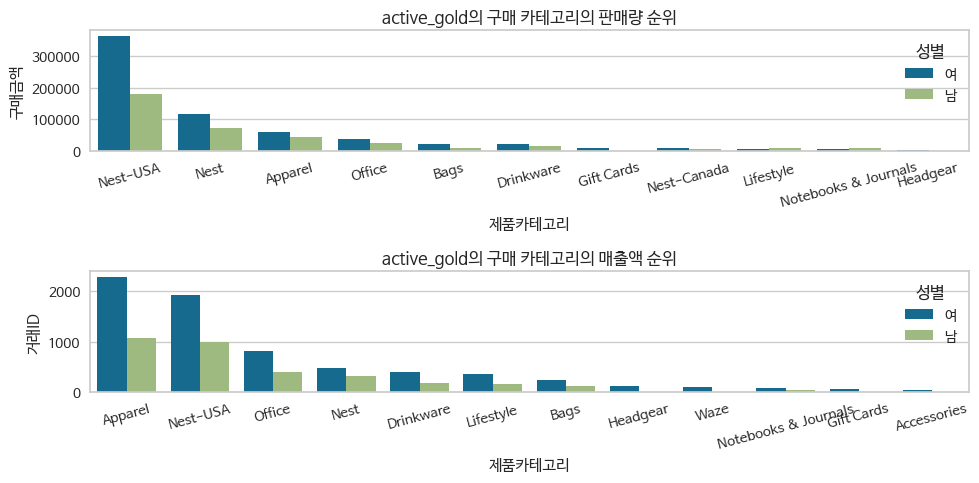

In [494]:
gr= active_gold_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =active_gold_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('active_gold의 구매 카테고리의 판매량 순위')
ax[1].set_title('active_gold의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()


### 쿠폰사용여부

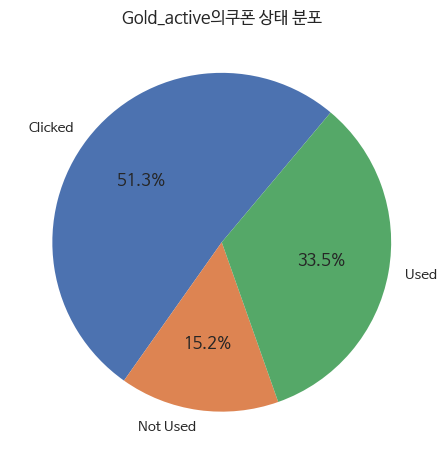

In [495]:
coupon_2 = active_gold_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon_2['총합'] = coupon_2['횟수'].sum()
coupon_2['비율'] = round(coupon_2['횟수']/coupon_2['총합'] * 100,2)


plt.pie(coupon_2['비율'], labels=coupon_2['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('Gold_active의쿠폰 상태 분포')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Lifestyle'),
  Text(4, 0, 'Drinkware'),
  Text(5, 0, 'Nest'),
  Text(6, 0, 'Bags'),
  Text(7, 0, 'Headgear'),
  Text(8, 0, 'Waze'),
  Text(9, 0, 'Notebooks & Journals'),
  Text(10, 0, 'Bottles'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Nest-Canada')])

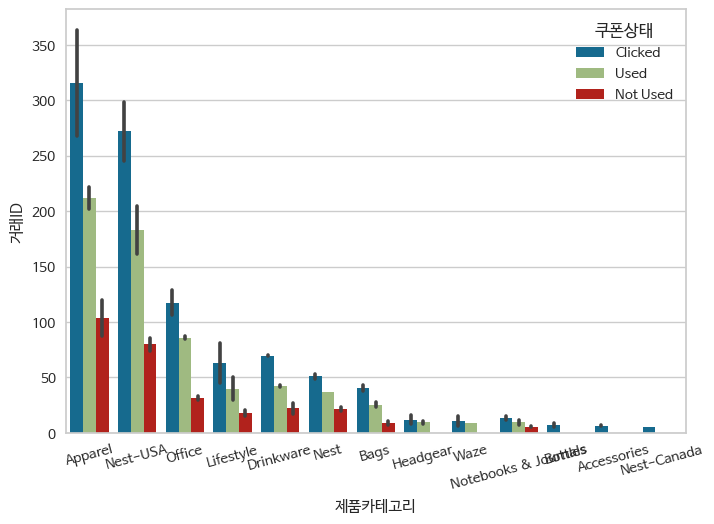

In [496]:
gr3 =active_vip_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')

plt.xticks(rotation=15)

##신규 or 복귀

In [497]:
active_New = active_user.loc[active_user['군집'] == 'New']
inactive_New = inactive_user.loc[inactive_user['군집'] == 'New']

ra= round(active_New['고객ID'].count() / (active_New['고객ID'].count() + inactive_New['고객ID'].count()),2)

print('New군집의 active_user의 수 : ', active_New['고객ID'].count())
print('New군집의 inactive_user의 수 : ', inactive_New['고객ID'].count())
print('active_user의 비율 :', ra*100,'%')
print('active_user_New 의 매출비중:', round(active_New['M'].sum() / rfm_df['M'].sum(),2)*100,'%')

New군집의 active_user의 수 :  408
New군집의 inactive_user의 수 :  0
active_user의 비율 : 100.0 %
active_user_New 의 매출비중: 19.0 %


<Axes: xlabel='성별', ylabel='count'>

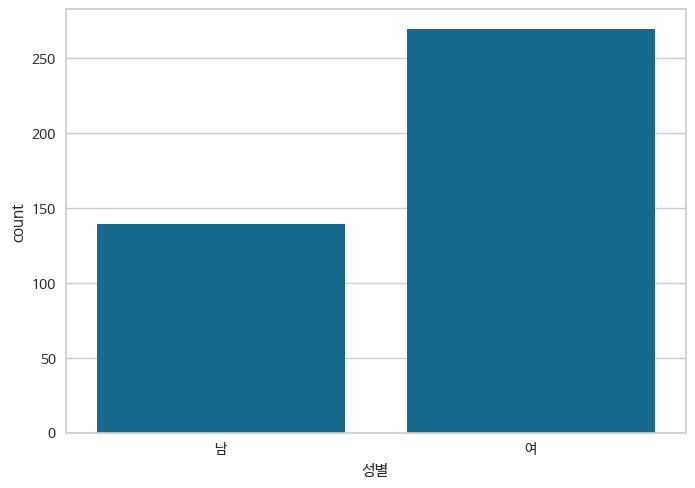

In [498]:
active_New = active_user.loc[active_user['군집'] == 'New']
sns.countplot(data= active_New,
            x='성별')


In [499]:
active_New[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,408.000000,408.000000,408.000000,408.000000
mean,41.737745,23.649510,2231.250515,25.681373
std,26.175975,15.824039,1555.240995,14.129845
min,0.000000,1.000000,1.000000,2.000000
25%,19.000000,11.000000,888.350000,14.000000
50%,34.500000,20.500000,2004.750000,25.000000
75%,65.000000,35.000000,3250.757500,38.000000
max,90.000000,67.000000,6791.940000,50.000000


###월별 매출액

Text(0.5, 1.0, '월별 New_active_user의 매출액')

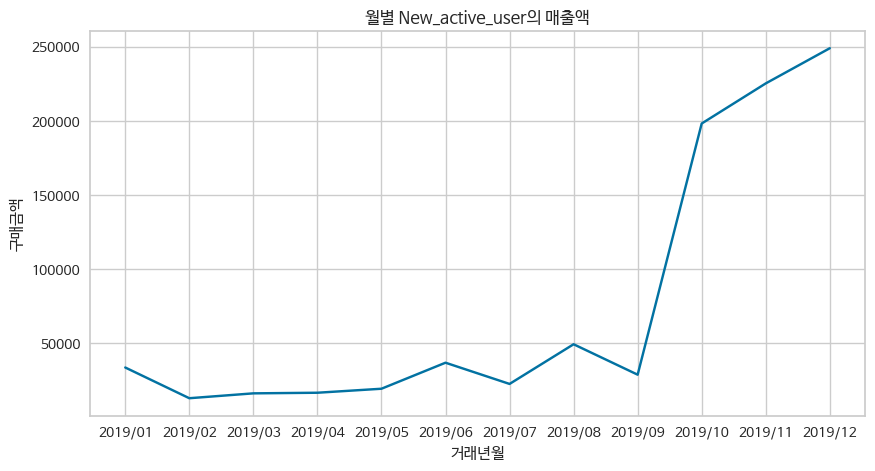

In [500]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
active_New_sales = sales.loc[sales['고객ID'].isin(active_New['고객ID'])]

active_New_gr = active_New_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_New_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 New_active_user의 매출액')

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 New_active_user의 매출액')

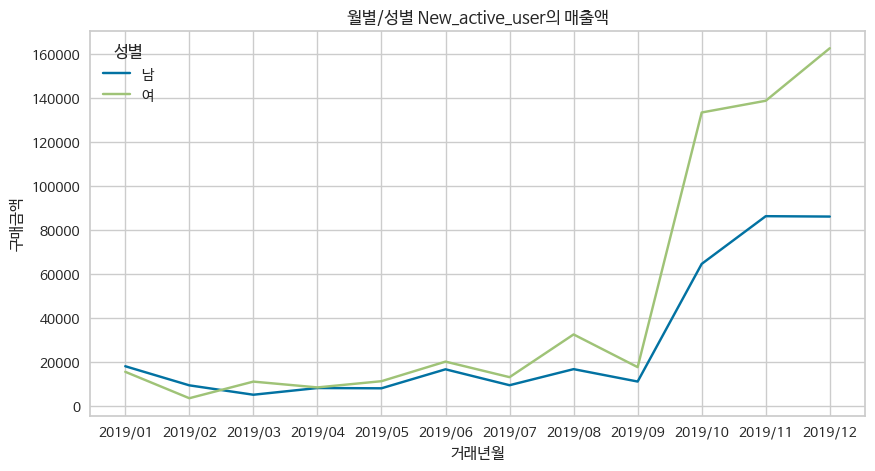

In [501]:
active_New_sales = sales.loc[sales['고객ID'].isin(active_New['고객ID'])]

active_New_gr2 = active_New_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= active_New_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 New_active_user의 매출액')



### 구매카테고리별 판매량과 매출액의 비교

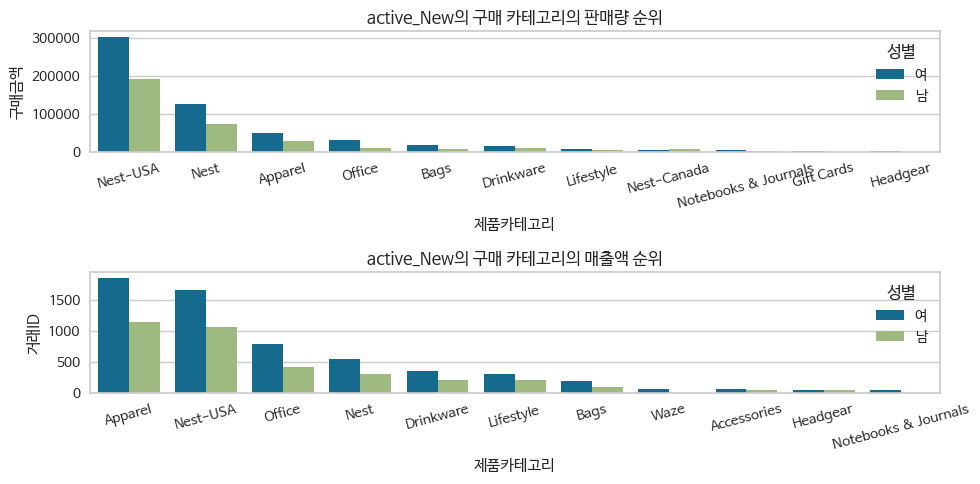

In [502]:
gr= active_New_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =active_New_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('active_New의 구매 카테고리의 판매량 순위')
ax[1].set_title('active_New의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()


### 쿠폰사용여부

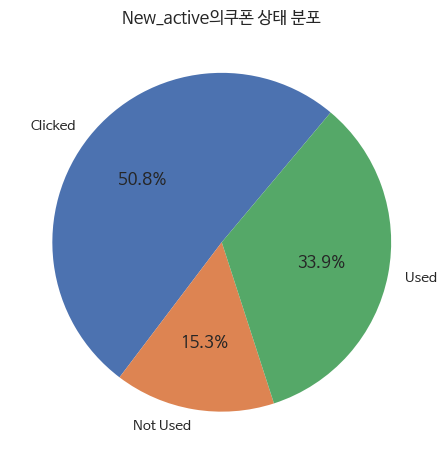

In [503]:
coupon_2 = active_New_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon_2['총합'] = coupon_2['횟수'].sum()
coupon_2['비율'] = round(coupon_2['횟수']/coupon_2['총합'] * 100,2)


plt.pie(coupon_2['비율'], labels=coupon_2['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('New_active의쿠폰 상태 분포')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Nest'),
  Text(4, 0, 'Drinkware'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Bags'),
  Text(7, 0, 'Waze'),
  Text(8, 0, 'Headgear'),
  Text(9, 0, 'Accessories'),
  Text(10, 0, 'Notebooks & Journals'),
  Text(11, 0, 'Nest-Canada')])

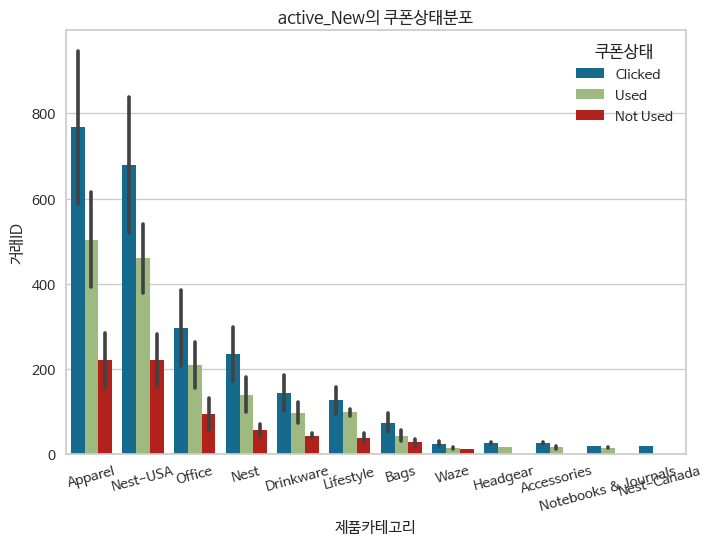

In [504]:
gr3 =active_New_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')

plt.title('active_New의 쿠폰상태분포')
plt.xticks(rotation=15)

## Silver

In [505]:
# silver > 모두가 비활동 고객들
active_Silver = active_user.loc[active_user['군집'] == 'Silver']
inactive_Silver = inactive_user.loc[inactive_user['군집'] == 'Silver']

ra= round(active_Silver['고객ID'].count() / (active_Silver['고객ID'].count() + inactive_Silver['고객ID'].count()),2)
inac = round(inactive_Silver['고객ID'].count() / (active_Silver['고객ID'].count() + inactive_Silver['고객ID'].count()),2)
print('Silver군집의 active_user의 수 : ', active_Silver['고객ID'].count())
print('Silver군집의 inactive_user의 수 : ', inactive_Silver['고객ID'].count())
print('active_user의 비율 :', ra*100,'%')
print('active_user_Silver 의 매출비중:', round(active_Silver['M'].sum() / rfm_df['M'].sum(),2)*100,'%')
print('inactive_user_Silver 의 매출비중:', round(inactive_Silver['M'].sum() / rfm_df['M'].sum(),2)*100,'%')

Silver군집의 active_user의 수 :  0
Silver군집의 inactive_user의 수 :  166
active_user의 비율 : 0.0 %
active_user_Silver 의 매출비중: 0.0 %
inactive_user_Silver 의 매출비중: 5.0 %


<Axes: xlabel='성별', ylabel='count'>

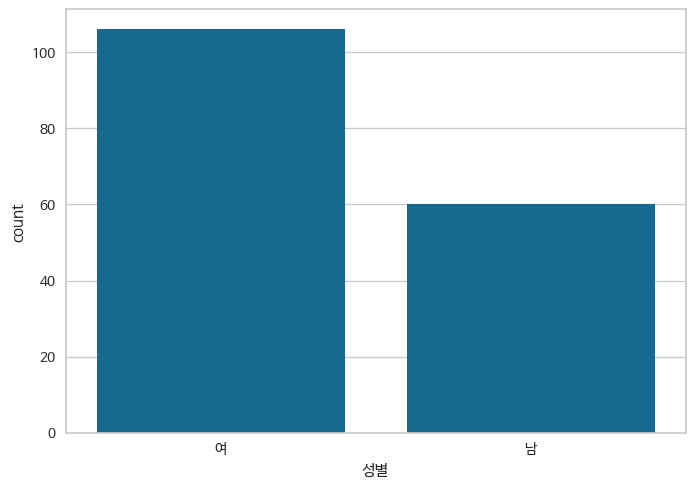

In [506]:
inactive_Silver = inactive_user.loc[inactive_user['군집'] == 'Silver']
sns.countplot(data= inactive_Silver,
            x='성별')


In [507]:
inactive_Silver[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,166.000000,166.000000,166.00000,166.000000
mean,206.108434,19.427711,1468.51747,26.036145
std,13.475915,15.123057,1359.45200,14.397766
min,181.000000,1.000000,2.99000,2.000000
25%,194.000000,8.000000,372.44750,13.250000
50%,205.000000,17.000000,1107.10000,27.000000
75%,220.000000,27.750000,1952.91750,38.750000
max,234.000000,75.000000,5998.46000,50.000000


### 월별 매출액

Text(0.5, 1.0, '월별 Silver_inactive_user의 매출액')

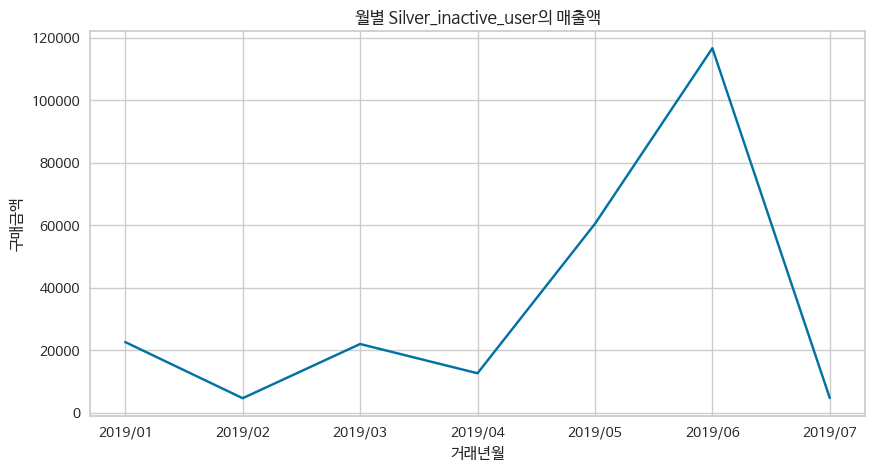

In [508]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
inactive_Silver_sales = sales.loc[sales['고객ID'].isin(inactive_Silver['고객ID'])]

inactive_Silver_gr = inactive_Silver_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= inactive_Silver_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 Silver_inactive_user의 매출액')

# 7월 이후 구매가 없음

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 Silver_inactive_user의 매출액')

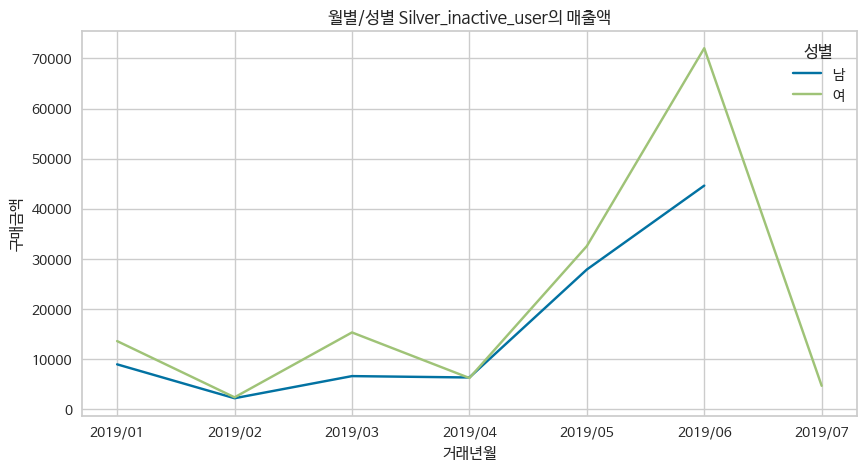

In [509]:
inactive_Silver_sales = sales.loc[sales['고객ID'].isin(inactive_Silver['고객ID'])]

inactive_Silver_gr2 = inactive_Silver_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= inactive_Silver_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 Silver_inactive_user의 매출액')



### 구매카테고리별 판매량과 매출액의 비교

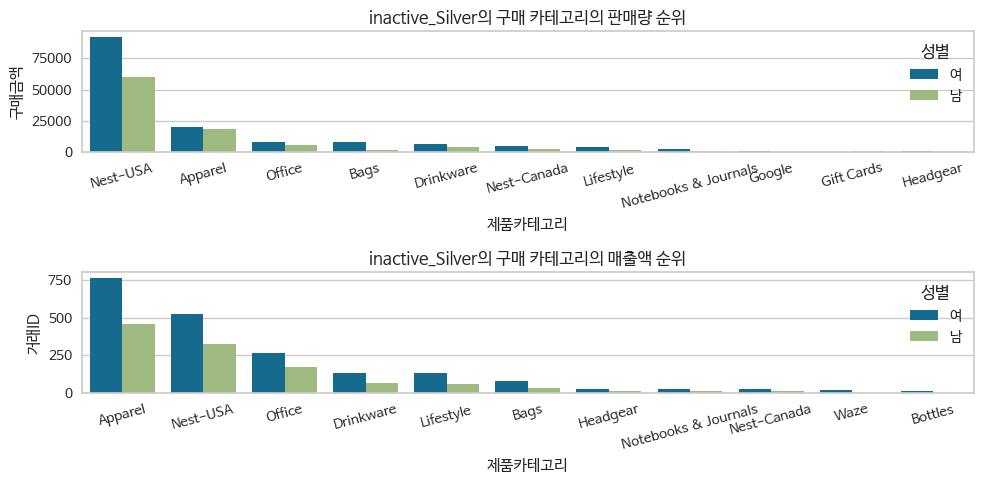

In [510]:
gr= inactive_Silver_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =inactive_Silver_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('inactive_Silver의 구매 카테고리의 판매량 순위')
ax[1].set_title('inactive_Silver의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()


### 쿠폰사용여부

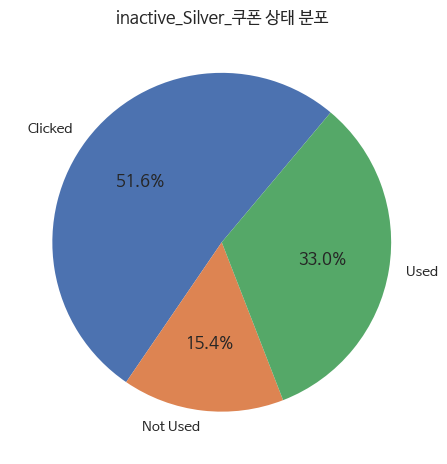

In [511]:
coupon = inactive_Silver_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon['총합'] = coupon['횟수'].sum()
coupon['비율'] = round(coupon['횟수']/coupon['총합'] * 100,2)


plt.pie(coupon['비율'], labels=coupon['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('inactive_Silver_쿠폰 상태 분포')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Drinkware'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Nest-Canada'),
  Text(7, 0, 'Headgear'),
  Text(8, 0, 'Notebooks & Journals'),
  Text(9, 0, 'Bottles'),
  Text(10, 0, 'Waze'),
  Text(11, 0, 'Fun'),
  Text(12, 0, 'Google'),
  Text(13, 0, 'Housewares')])

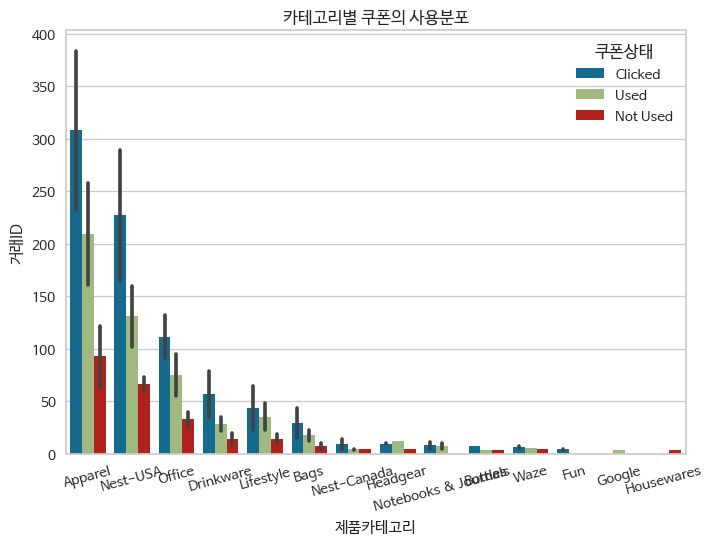

In [512]:
gr3 =inactive_Silver_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')
plt.title('카테고리별 쿠폰의 사용분포')
plt.xticks(rotation=15)

## Bronze


In [513]:
# Bronze > 모두가 비활동 고객들
active_Bronze = active_user.loc[active_user['군집'] == 'Bronze']
inactive_Bronze = inactive_user.loc[inactive_user['군집'] == 'Bronze']

ra= round(active_Bronze['고객ID'].count() / (active_Bronze['고객ID'].count() + inactive_Bronze['고객ID'].count()),2)
inac = round(inactive_Bronze['고객ID'].count() / (active_Bronze['고객ID'].count() + inactive_Bronze['고객ID'].count()),2)
print('Bronze군집의 active_user의 수 : ', active_Bronze['고객ID'].count())
print('Bronze군집의 inactive_user의 수 : ', inactive_Bronze['고객ID'].count())
print('active_user의 비율 :', ra*100,'%')
print('active_user_Bronze 의 매출비중:', round(active_Bronze['M'].sum() / rfm_df['M'].sum(),2)*100,'%')
print('inactive_user_Bronze 의 매출비중:', round(inactive_Bronze['M'].sum() / rfm_df['M'].sum(),2)*100,'%')

Bronze군집의 active_user의 수 :  0
Bronze군집의 inactive_user의 수 :  316
active_user의 비율 : 0.0 %
active_user_Bronze 의 매출비중: 0.0 %
inactive_user_Bronze 의 매출비중: 12.0 %


<Axes: xlabel='성별', ylabel='count'>

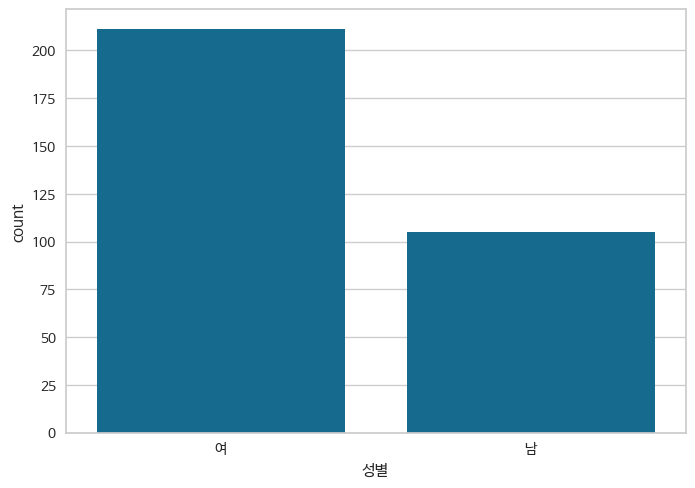

In [514]:
inactive_Bronze = inactive_user.loc[inactive_user['군집'] == 'Bronze']
sns.countplot(data= inactive_Bronze,
            x='성별')
# 여자가 더많네

In [515]:
inactive_Bronze[['R', 'F', 'M', '가입기간']].describe()

,R,F,M,가입기간
count,316.000000,316.000000,316.000000,316.000000
mean,296.670886,21.528481,1831.943291,27.104430
std,39.570302,20.395513,1908.083821,13.892964
min,229.000000,1.000000,1.200000,2.000000
25%,261.750000,6.000000,440.387500,15.000000
50%,289.000000,14.000000,1148.410000,28.000000
75%,335.000000,30.000000,2473.590000,39.000000
max,364.000000,87.000000,9348.300000,50.000000


### 월별 매출액

Text(0.5, 1.0, '월별 Bronze_inactive_user의 매출액')

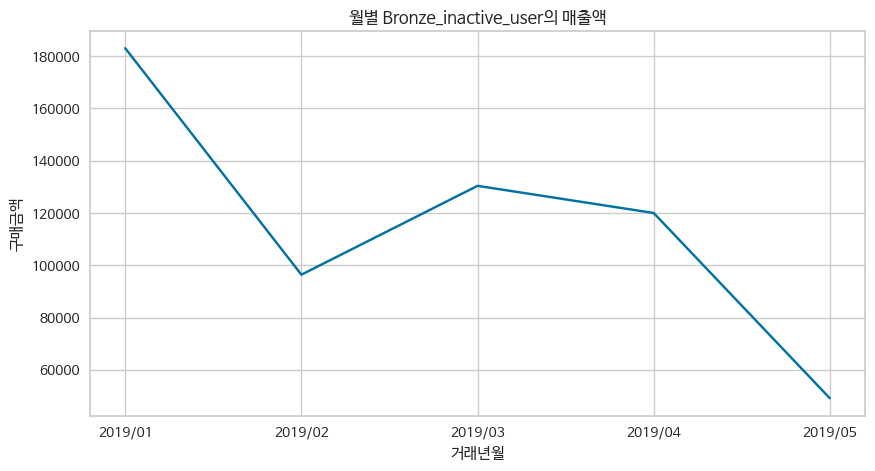

In [516]:
# 매출액 비교 전체 매출액 중 비중 , 월별 매출액 , 성별,월별 매출액
inactive_Bronze_sales = sales.loc[sales['고객ID'].isin(inactive_Bronze['고객ID'])]

inactive_Bronze_gr = inactive_Bronze_sales.groupby('거래년월')[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= inactive_Bronze_gr,
             x='거래년월',
             y='구매금액')

plt.title('월별 Bronze_inactive_user의 매출액')

# 5월 이후 구매가 없음

### 성별 매출 추이

Text(0.5, 1.0, '월별/성별 Bronze_inactive_user의 매출액')

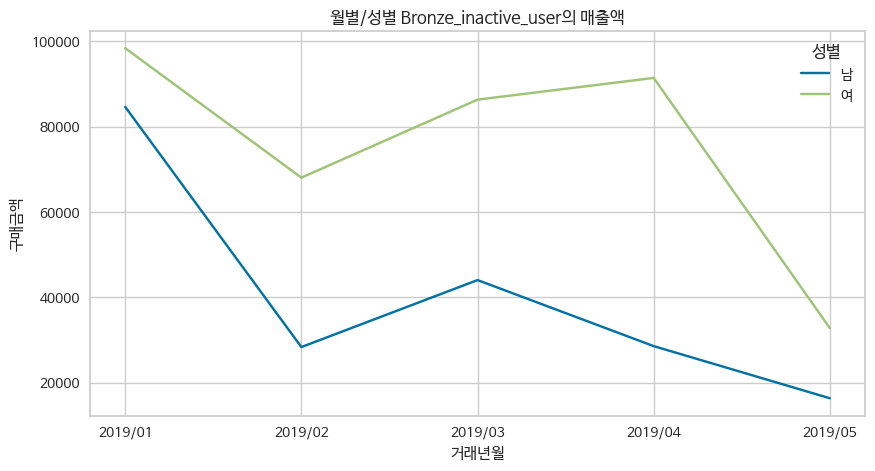

In [517]:
inactive_Bronze_sales = sales.loc[sales['고객ID'].isin(inactive_Bronze['고객ID'])]

inactive_Bronze_gr2 = inactive_Bronze_sales.groupby(['거래년월','성별'])[['구매금액']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data= inactive_Bronze_gr2,
             x='거래년월',
             y='구매금액',
             hue='성별')
plt.title('월별/성별 Bronze_inactive_user의 매출액')



### 구매카테고리별 판매량과 매출액의 비교

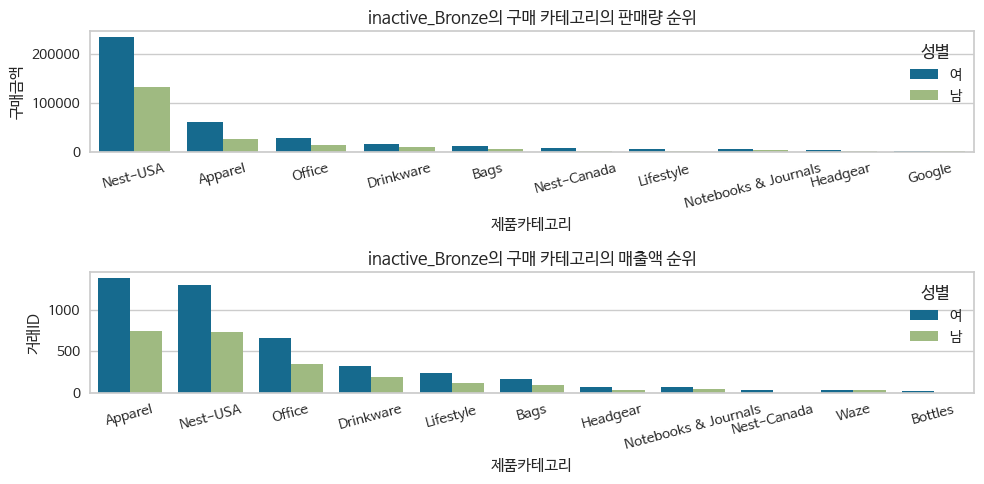

In [518]:
gr= inactive_Bronze_sales.groupby(['제품카테고리','성별'])[['거래ID']].count().reset_index()
gr.sort_values(by='거래ID', ascending=False,inplace=True)


gr2 =inactive_Bronze_sales.groupby(['제품카테고리','성별'])[['구매금액']].sum().reset_index()
gr2.sort_values(by='구매금액', ascending=False,inplace=True)


fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.barplot(data=gr2.head(20),
             x='제품카테고리',
             y='구매금액',
            hue='성별', ax=ax[0])

sns.barplot(data=gr.head(20),
             x='제품카테고리',
             y='거래ID',
            hue='성별', ax=ax[1])

ax[0].set_title('inactive_Bronze의 구매 카테고리의 판매량 순위')
ax[1].set_title('inactive_Bronze의 구매 카테고리의 매출액 순위')


ax[0].tick_params(axis='x', rotation=15)
ax[1].tick_params(axis='x', rotation=15)
plt.tight_layout()


### 쿠폰사용여부

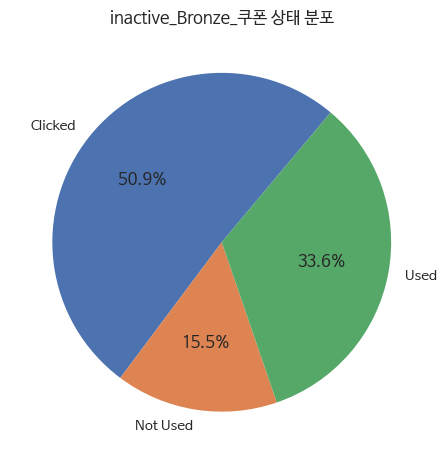

In [519]:
coupon = inactive_Bronze_sales.groupby('쿠폰상태')[['쿠폰상태']].size().reset_index(name='횟수')
coupon['총합'] = coupon['횟수'].sum()
coupon['비율'] = round(coupon['횟수']/coupon['총합'] * 100,2)


plt.pie(coupon['비율'], labels=coupon['쿠폰상태'], autopct='%1.1f%%', startangle=50,colors=sns.color_palette('deep'))
plt.title('inactive_Bronze_쿠폰 상태 분포')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Apparel'),
  Text(1, 0, 'Nest-USA'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Drinkware'),
  Text(4, 0, 'Lifestyle'),
  Text(5, 0, 'Bags'),
  Text(6, 0, 'Notebooks & Journals'),
  Text(7, 0, 'Headgear'),
  Text(8, 0, 'Waze'),
  Text(9, 0, 'Nest-Canada'),
  Text(10, 0, 'Bottles'),
  Text(11, 0, 'Housewares'),
  Text(12, 0, 'Fun'),
  Text(13, 0, 'More Bags'),
  Text(14, 0, 'Google')])

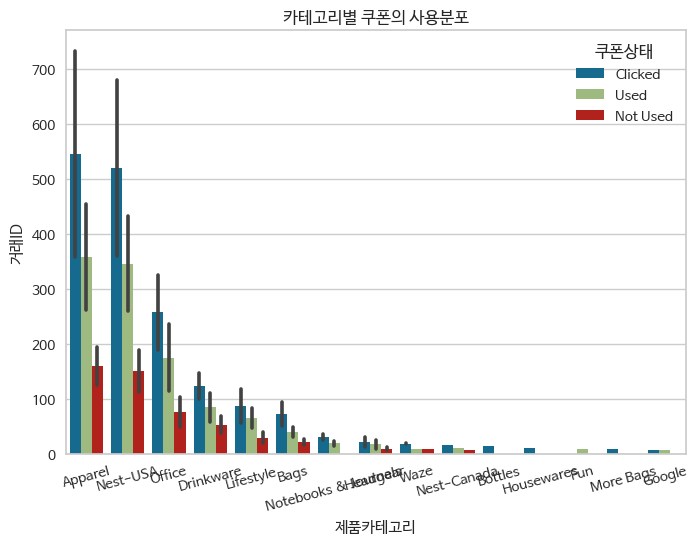

In [520]:
gr3 =inactive_Bronze_sales.groupby(['제품카테고리','성별','쿠폰상태'])[['거래ID']].count().reset_index()
gr3.sort_values(by='거래ID', ascending=False,inplace=True)

sns.barplot(data=gr3.head(60),
             x='제품카테고리',
             y='거래ID',
             hue='쿠폰상태')
plt.title('카테고리별 쿠폰의 사용분포')
plt.xticks(rotation=15)

In [521]:
# VVIP / VIP
# Gold
# New
# Silver / Bronze 로 묶을 수 있었다.

# VVIP / VIP > 최상위 매출의 고객들이며 모두가 active_user였다.
# Gold >  85%가 active_user인 활동 고객층이다.
# New >  모두가 active_user이고, R수치가 낮아 신규/복귀 고객들로 예상되며, 향후 상위 등급으로 올라갈 가능성이 높은 핵심 군집이라고 예상된다
# Silver / Bronze = 모두가 inactive 고객들이며, 먼저 다시 고객들의 복귀를 유도해야하는 군집이다.



In [522]:
# 생각보다 군집별로 RFM 차이 이외에는 다른 점이 보이지 않았다.
# 단순 KMEANS와 RFM을 통해서 고객을 분류하는 것 + 추가로 특별한 기준을 더해서 고객을 분류해야 군집별로 차이를 명확하게 드러낼 수 있을 것 같다.